# Data Clean-up

--- 
## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

--- 
## Load Data

In [3]:
path = '../data/raw/winequality-red.csv' 
wineDF = pd.read_csv(path, sep=';')
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# store variable names in a list for easier iteration
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',	'density', 'pH', 'sulphates', 'alcohol']

In [5]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


--- 
## Drop Duplicated Rows

<mark> not sure if this is necessary </mark>

In [34]:
sum(wineDF.duplicated())

240

In [35]:
wineDF.drop_duplicates(inplace=True)

In [36]:
sum(wineDF.duplicated())

0

--- 
## Reclassify Response

<mark> use count plot to better visualize </mark>  
<mark> show imbalance of data -> why reclassifying response </mark>

In [37]:
wineDF['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [38]:
# number of classes
n = 3

dummy = wineDF['quality'].copy()
for i in range(dummy.size):
    if (dummy.iloc[i] <= 6):
        dummy.iloc[i] = 0
    elif (dummy.iloc[i] >= 7):
        dummy.iloc[i] = 1

dummy.value_counts()

0    1175
1     184
Name: quality, dtype: int64

<mark> Use 2 classes </mark>

In [39]:
# replace quality columns
# drop original quality columns
wineDF.drop(['quality'], axis=1)
# concatenate new quality columns
wineDF['quality'] = dummy

wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [40]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


--- 
## Remove Outliers

<Figure size 14400x7200 with 0 Axes>

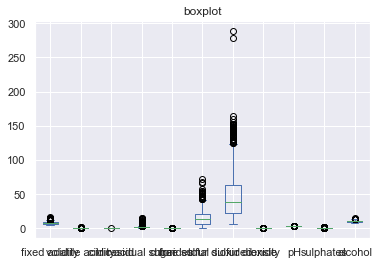

In [41]:
f = plt.figure(figsize=(200,100))

# Plot the dataframe
ax = wineDF[variables].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

<mark> don't know how to make this plot wider </mark>

In [42]:
wineDF.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 2.133662
dtype: float64

In [43]:
def countOutliers(var, df)->int:
    '''
    A utility function to print number of outliers in df[var]
    Input: variable names and dataframe
    Output: number of outliers in the dataframe
    '''
    data = df[var]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    counter = 0
    for item in data:
        if item < (q1 - 1.5*iqr) or item > (q3 + 1.5*iqr):
            counter += 1
    
    return counter

<mark> can add boxplot or countplot for outliers here </mark>

In [44]:
# count outliers for each variable
for var in variables:
    print(f"For variable {var}, it has {countOutliers(var, wineDF)} outliers.")

For variable fixed acidity, it has 41 outliers.
For variable volatile acidity, it has 19 outliers.
For variable citric acid, it has 1 outliers.
For variable residual sugar, it has 126 outliers.
For variable chlorides, it has 87 outliers.
For variable free sulfur dioxide, it has 26 outliers.
For variable total sulfur dioxide, it has 45 outliers.
For variable density, it has 35 outliers.
For variable pH, it has 28 outliers.
For variable sulphates, it has 55 outliers.
For variable alcohol, it has 12 outliers.


In [45]:
def dropOutliers(var, df)->None:
    '''
    A utility function to drop outliers
    Input: variable name and dataframe
    Output: None
    '''
    iqr = 1.5 * (np.percentile(df[var], 75) - np.percentile(df[var], 25))
    df.drop(df[df[var] > (iqr + np.percentile(df[var], 75))].index, inplace=True)
    df.drop(df[df[var] < (np.percentile(df[var], 25) - iqr)].index, inplace=True)

In [46]:
for var in variables:
    dropOutliers(var=var, df=wineDF)

In [47]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,8.138579,0.522695,0.247949,2.188934,0.078129,14.719797,41.176650,0.996507,3.324579,0.628853,10.395381,0.126904
std,1.460696,0.168185,0.182103,0.448518,0.014966,8.574557,25.201208,0.001583,0.131157,0.111660,0.990583,0.333034
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992400,2.980000,0.330000,8.700000,0.000000
25%,7.100000,0.390000,0.080000,1.900000,0.068000,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,0.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996500,3.320000,0.610000,10.100000,0.000000
75%,9.000000,0.635000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997480,3.410000,0.700000,11.100000,0.000000
max,12.300000,1.010000,0.730000,3.650000,0.121000,40.000000,114.000000,1.000400,3.680000,0.940000,13.400000,1.000000


<mark> compare deviation before and after removing outliers </mark>

<Figure size 14400x7200 with 0 Axes>

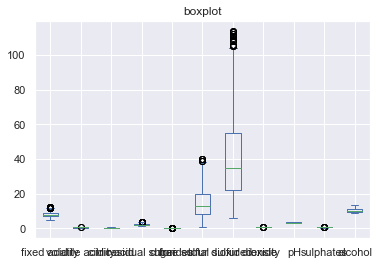

In [48]:
f = plt.figure(figsize=(200,100))

# Plot the dataframe
ax = wineDF[variables].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [49]:
wineDF.skew()

fixed acidity           0.722042
volatile acidity        0.316022
citric acid             0.311817
residual sugar          0.628887
chlorides               0.176785
free sulfur dioxide     0.808687
total sulfur dioxide    0.919328
density                 0.035145
pH                      0.126049
sulphates               0.531930
alcohol                 0.739741
quality                 2.245149
dtype: float64

In [50]:
# save the unscaled dataframe
path = '../data/'
wineDF.to_csv(path+'refined_wine.csv', index=False)

--- 
## Scale Varaibles

<Figure size 14400x7200 with 0 Axes>

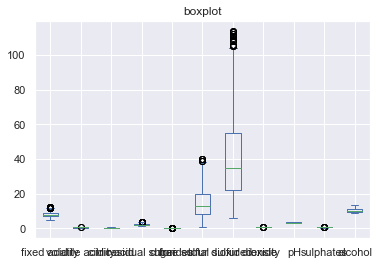

In [51]:
# plot box plot of each variable 
f = plt.figure(figsize=(200,100))

# Plot the dataframe
ax = wineDF[variables].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [52]:
predictors = pd.DataFrame(wineDF[variables])
response = pd.DataFrame(wineDF['quality'])

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
predictors = sc.fit_transform(predictors)

In [54]:
predictors = pd.DataFrame(predictors)
predictors.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.505892,1.054756,-1.362277,-0.644525,-0.142325,-0.434038,-0.284919,0.817412,1.414449,-0.616944,-1.005353
1,-0.231910,2.125547,-1.362277,0.916965,1.328430,1.199528,1.025208,0.185197,-0.950323,0.458296,-0.601346
2,-0.231910,1.411686,-1.142510,0.247755,0.927315,0.032695,0.509097,0.311640,-0.492625,0.189486,-0.601346
3,2.096930,-1.443756,1.714462,-0.644525,-0.209177,0.266062,0.747302,0.943855,-1.255455,-0.437737,-0.601346
4,-0.505892,0.816803,-1.362277,-0.867595,-0.209177,-0.200672,-0.046714,0.817412,1.414449,-0.616944,-1.005353


In [55]:
# predictors.rename(columns={1 : variables[i] for i in range(len(variables))}, inplace=True)
for i in range(len(variables)):
    predictors = predictors.rename(columns={i:variables[i]})
predictors.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.505892,1.054756,-1.362277,-0.644525,-0.142325,-0.434038,-0.284919,0.817412,1.414449,-0.616944,-1.005353
1,-0.231910,2.125547,-1.362277,0.916965,1.328430,1.199528,1.025208,0.185197,-0.950323,0.458296,-0.601346
2,-0.231910,1.411686,-1.142510,0.247755,0.927315,0.032695,0.509097,0.311640,-0.492625,0.189486,-0.601346
3,2.096930,-1.443756,1.714462,-0.644525,-0.209177,0.266062,0.747302,0.943855,-1.255455,-0.437737,-0.601346
4,-0.505892,0.816803,-1.362277,-0.867595,-0.209177,-0.200672,-0.046714,0.817412,1.414449,-0.616944,-1.005353


<Figure size 3600x1440 with 0 Axes>

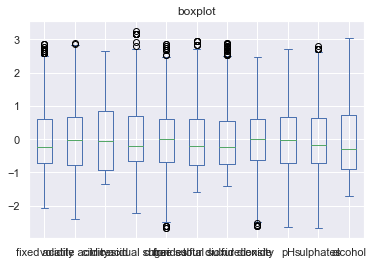

In [56]:
# plot box plot of each variable 
f = plt.figure(figsize=(50, 20))

# Plot the dataframe
ax = predictors[variables].plot(kind='box', title='boxplot')
# ax = predictors.plot(kind = 'box')
# Display the plot
plt.show()

## Store Processed Data

In [57]:
path = '../data/'
predictors.to_csv(path+'predictors.csv', index=False)
response.to_csv(path + 'response.csv', index=False)